<a href="https://colab.research.google.com/github/ravi260372/Data_Science_Python/blob/main/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# import datasets
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
# view the dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# dictionary of Boston
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# shape of the data 
boston.data.shape

(506, 13)

In [6]:
# feature names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# create the DataFrame of Features
# pass the array "boston.data" with column names = feature_names
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
115,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76
148,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32


In [8]:
# shape of the DatFrame
boston_df.shape

(506, 13)

In [9]:
# add the dependant variable
boston_df['House_Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# check missing values
boston_df.isna().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
House_Price    0
dtype: int64

In [11]:
# summary statistics
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
# correlation matrix : linear correaltions
x = boston_df.corr()
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


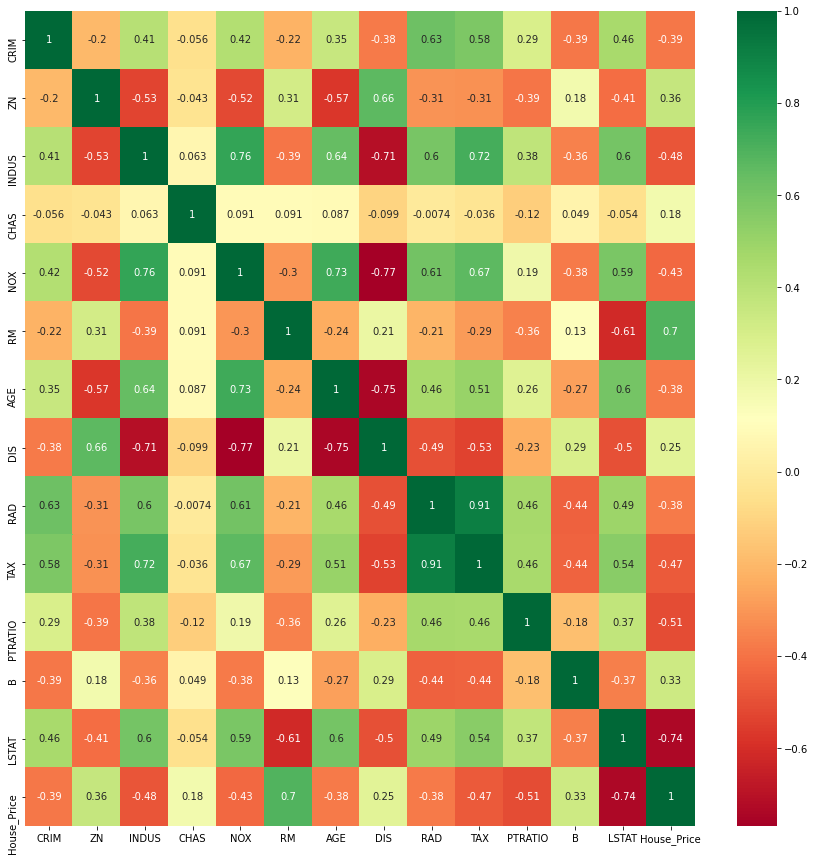

In [13]:
# correlation heatmap
plt.subplots(figsize = (15,15)) # set the size of the plot
sns.heatmap(x , cmap = 'RdYlGn' , annot = True)
plt.show();

In [14]:
# Step 1 : Create Features and Labels  
x = boston_df.drop('House_Price' , axis = 1)
y = boston_df['House_Price']

In [15]:
# Step 2 : Train Test Split
train_x , test_x , train_y , test_y = train_test_split(x , y , test_size = 0.25 , random_state = 1)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [16]:
# Step 3 : Create an Instance of the model  
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Step 4 : Fit the Model on Train data
model.fit(train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Step 5 : Predict on test data
predict_test = model.predict(test_x)

In [19]:
# Step 6 : Evaluate the model
from sklearn.metrics import mean_absolute_error

print("MEA for Test Data is")

np.round(mean_absolute_error(test_y , predict_test),2)

MEA for Test Data is


3.57

In [20]:
# Step 6 : Evaluate the model
from sklearn.metrics import mean_squared_error

print("RMSE for Test Data is")

np.round(mean_squared_error(test_y , predict_test),2)

RMSE for Test Data is


21.9

In [21]:
# Co-Efficients of Linear Regression
coeff_df = pd.DataFrame({'features':x.columns , 'coeff':model.coef_}) # create DataFrame by dictionary method
## here x is the "dataframe of features" and model_coeffs are the coefficients of the model
coeff_df = coeff_df.sort_values(by = ['coeff'])
coeff_df

,features,coeff
4,NOX,-21.232624
7,DIS,-1.471583
10,PTRATIO,-0.996138
12,LSTAT,-0.557414
0,CRIM,-0.114429
9,TAX,-0.010675
11,B,0.006277
6,AGE,0.006911
2,INDUS,0.038300
1,ZN,0.057130


In [22]:
# intercept
model.intercept_

45.19251538838367

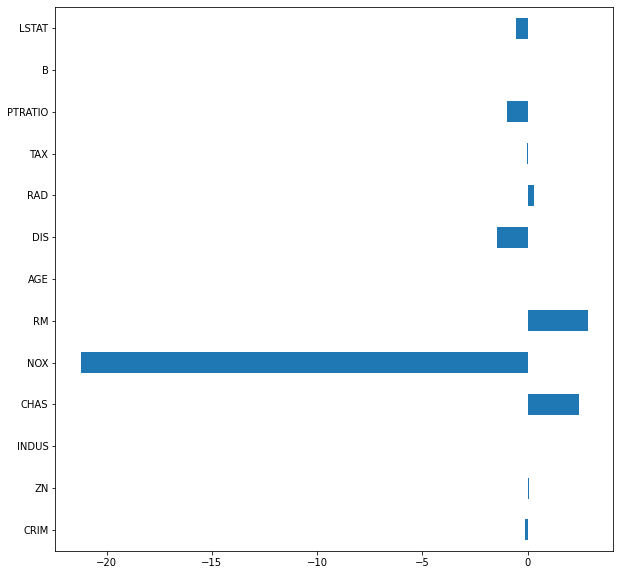

In [23]:
# plot improtance of features
plt.figure(figsize = (10,10))
ft_importance = pd.Series(model.coef_,index=x.columns)
ft_importance.plot(kind = 'barh')
plt.show();

In [24]:
# create a master dataframe by including test_y and predicted_y
fdf = pd.concat([test_x , test_y] , 1) ## concat y arrays by columns
fdf['Predicted'] = np.round(predict_test , 1) ## add a column "Predicted" to the fdf dataframe
fdf['Pred_Error'] = np.abs(fdf['House_Price'] - fdf['Predicted']) ## add a column "Prediction Error"
print(fdf.shape)
fdf.sample(5)

(127, 16)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,Predicted,Pred_Error
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9,9.8,2.1
85,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53,26.6,27.4,0.8
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5,20.4,4.1
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0,14.9,3.9
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2,20.9,4.7


In [25]:
# Prediction Error
fdf["Pred_Error"].describe()

count    127.000000
mean       3.574016
std        3.034699
min        0.000000
25%        1.200000
50%        3.000000
75%        4.950000
max       15.800000
Name: Pred_Error, dtype: float64